Found 1943 matched req_ids with durations


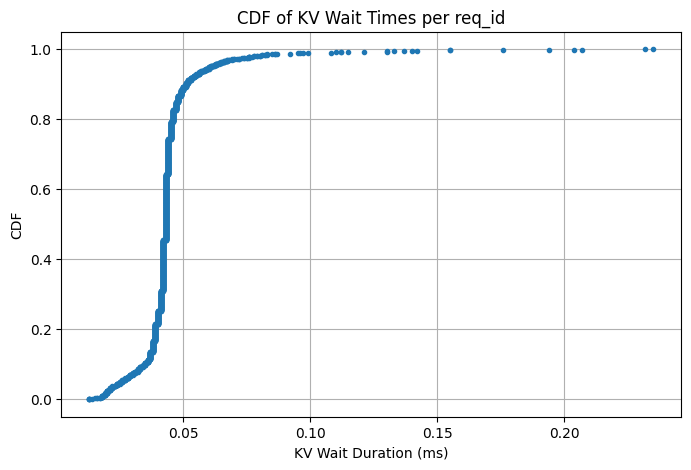

In [6]:
import re
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# === Config ===
log_file_path = "/mnt/network_drive/lrq/logs/logs_2025-07-26-22-06-19/run_0/router.err"  # replace this with your actual file path

# === Regex Patterns ===
waiting_pattern = re.compile(r'(\d{4}/\d{2}/\d{2} \d{2}:\d{2}:\d{2}\.\d+).*req (\S+) is waiting for kv')
ready_pattern = re.compile(r'(\d{4}/\d{2}/\d{2} \d{2}:\d{2}:\d{2}\.\d+).*req (\S+) kv ready!')

# === Data Storage ===
waiting_times = {}
ready_times = {}

# === Read and Parse Log ===
with open(log_file_path, "r") as f:
    for line in f:
        waiting_match = waiting_pattern.search(line)
        if waiting_match:
            timestamp_str, req_id = waiting_match.groups()
            waiting_times[req_id] = datetime.strptime(timestamp_str, "%Y/%m/%d %H:%M:%S.%f")
            continue

        ready_match = ready_pattern.search(line)
        if ready_match:
            timestamp_str, req_id = ready_match.groups()
            ready_times[req_id] = datetime.strptime(timestamp_str, "%Y/%m/%d %H:%M:%S.%f")

# === Match Requests and Compute Durations ===
durations_ms = []
for req_id in waiting_times:
    if req_id in ready_times:
        delta = ready_times[req_id] - waiting_times[req_id]
        durations_ms.append(delta.total_seconds() * 1000)

print(f"Found {len(durations_ms)} matched req_ids with durations")

# === Plot CDF ===
durations_ms.sort()
cdf = np.arange(len(durations_ms)) / len(durations_ms)

plt.figure(figsize=(8, 5))
plt.plot(durations_ms, cdf, marker='.', linestyle='none')
plt.xlabel("KV Wait Duration (ms)")
plt.ylabel("CDF")
plt.title("CDF of KV Wait Times per req_id")
plt.grid(True)
plt.show()